In [17]:
from selenium.webdriver import Chrome
from utils.login import login_glassdoor
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains

In [18]:
driver = Chrome()
driver2 = Chrome()
driver.get("https://www.glassdoor.fr/Avis/index.htm")
login_glassdoor(driver, "severin.lefebure@edu.devinci.fr", "jesuisungenie")

<selenium.webdriver.chrome.webdriver.WebDriver (session="50c23e84a9313f783a6f2e97bf158e13")>

In [19]:
login_glassdoor(driver2, "severin.lefebure@edu.devinci.fr", "jesuisungenie")

<selenium.webdriver.chrome.webdriver.WebDriver (session="301122d0c8f19f8bfb64e7837f31971e")>

In [20]:
driver.implicitly_wait(0.01)
driver2.implicitly_wait(0.01)

In [31]:
employer_data = {}
employers = []

for i in range(1,5):
    driver.get(f"https://www.glassdoor.fr/Avis/index.htm?overall_rating_low=3.5&page={i}&filterType=RATING_OVERALL")
    employers = driver.find_elements(By.CSS_SELECTOR, '[data-test="employer-card-single"]')
    for employer in employers:
        name = employer.find_element(By.CSS_SELECTOR, '[data-test="employer-short-name"]').text
        ranking = employer.find_element(By.CSS_SELECTOR, '[data-test="rating"]').text
        link = employer.find_element(By.CSS_SELECTOR, '[data-test="cell-Reviews-url"]').get_attribute("href")  
        employer_data[name] = {"Rank": ranking, "Link": link}

In [49]:
for i, employer in enumerate(employer_data):
    print(f"{i+1}/{len(employer_data)}") 
    print(employer_data[employer]["Link"])
    driver2.get(employer_data[employer]["Link"])
    # Reviews
    reviews = driver2.find_elements(By.CLASS_NAME, "review-details__review-details-module__reviewDetails")[:20]
    
    reviews_data = []
    
    for review in reviews:
        hover = ActionChains(driver2).move_to_element(review).click()
        hover.perform()
        rating = review.find_element(By.CLASS_NAME, "review-details__review-details-module__overallRating").text
        date = review.find_element(By.CLASS_NAME, "review-details__review-details-module__reviewDate").text
        job_type = review.find_element(By.CLASS_NAME, "review-details__review-details-module__employee").text
        details = review.find_elements(By.CLASS_NAME, "mr-std.review-details__review-details-module__ratingDetail")
        details_list = []
        for detail in details:
            title = detail.find_element(By.CLASS_NAME, "review-details__review-details-module__ratingTitle").text
            try:
                detail.find_element(By.CLASS_NAME, "review-details__review-details-module__negativeStyles")
                sentiment = "bad"
            except:
                try:
                    detail.find_element(By.CLASS_NAME, "review-details__review-details-module__positiveStyles")
                    sentiment = "good"
                except:
                    try:
                        detail.find_element(By.CLASS_NAME, "review-details__review-details-module__neutralStyles")
                        sentiment = "neutral"
                    except:
                        detail.find_element(By.CLASS_NAME, "review-details__review-details-module__noDataStyles")
                        sentiment = "None"
            details_list.append((title,sentiment))
        
        pros = review.find_element(By.CSS_SELECTOR, '[data-test="pros"]').text
        cons = review.find_element(By.CSS_SELECTOR, '[data-test="cons"]').text 
        
        #print((rating,date,job_type,details_list,pros,cons))
        
        reviews_data.append((rating,date,job_type,details_list,pros,cons))
    
    employer_data[employer]["Reviews"] = reviews_data
    
    with open('dict_reviews.txt','w', encoding="utf-8") as f:
        f.write(employer_data.__str__())


1/40
https://www.glassdoor.fr/Avis/McDonald-s-Avis-E432.htm
2/40
https://www.glassdoor.fr/Avis/Amazon-Avis-E6036.htm
3/40
https://www.glassdoor.fr/Avis/Accenture-Avis-E4138.htm
4/40
https://www.glassdoor.fr/Avis/Deloitte-Avis-E2763.htm
5/40
https://www.glassdoor.fr/Avis/Capgemini-Avis-E3803.htm
6/40
https://www.glassdoor.fr/Avis/EY-Avis-E2784.htm
7/40
https://www.glassdoor.fr/Avis/PwC-Avis-E8450.htm
8/40
https://www.glassdoor.fr/Avis/KPMG-Avis-E2867.htm
9/40
https://www.glassdoor.fr/Avis/IBM-Avis-E354.htm
10/40
https://www.glassdoor.fr/Avis/BNP-Paribas-Avis-E10342.htm
11/40
https://www.glassdoor.fr/Avis/Soci%C3%A9t%C3%A9-G%C3%A9n%C3%A9rale-Avis-E10350.htm
12/40
https://www.glassdoor.fr/Avis/Microsoft-Avis-E1651.htm
13/40
https://www.glassdoor.fr/Avis/CGI-Avis-E8452.htm
14/40
https://www.glassdoor.fr/Avis/L-Or%C3%A9al-Avis-E3470.htm
15/40
https://www.glassdoor.fr/Avis/Google-Avis-E9079.htm
16/40
https://www.glassdoor.fr/Avis/Carrefour-Avis-E3118.htm
17/40
https://www.glassdoor.fr/Avis/O

In [51]:
dict_reviews = eval(open('dict_reviews.txt', encoding="utf-8").read())

In [52]:
for key, value in dict_reviews.items():
    print(key, len(value["Reviews"]))

McDonald's 10
Amazon 10
Accenture 10
Deloitte 10
Capgemini 10
EY 10
PwC 10
KPMG 10
IBM 10
BNP Paribas 10
Société Générale 10
Microsoft 10
CGI 10
L'Oréal 10
Google 10
Carrefour 10
Orange 10
HSBC 10
Apple 10
Capgemini Engineering 10
Sopra Steria 10
Sanofi 10
Oracle 10
Manpower 10
Atos 10
Thales 10
Schneider Electric 10
Adecco 10
Randstad 10
Cognizant Technology Solutions 10
Tata Consultancy Services 10
Airbus 10
SAP 10
GE 10
Decathlon 10
Salesforce 10
Renault Group 10
DXC Technology 10
EDF 10
H&M 10


In [53]:
len(dict_reviews.keys())

40

In [54]:
import pandas as pd
df = []
names = ["Company", "Rank", "Review_score", "Date_review", "Job", "Recommandation", "Approb CEO", "Perspective", "Pros", "Cons"]
for key, value in dict_reviews.items():
    rank = value["Rank"]
    for review in value["Reviews"]:
        row = [key, rank] + list(review[:-3]) + [tag[1] for tag in review[-3]] + list(review[-2:])
        df.append(row)

print(len(df))

df=pd.DataFrame(df,columns=names)
df
        

400


,Company,Rank,Review_score,Date_review,Job,Recommandation,Approb CEO,Perspective,Pros,Cons
0,McDonald's,"3,5","5,0",15 janv. 2024,chef de secteur GMS,None,None,None,titre resto conges payes ambiance,rien horaire management fixe variable tres peu
1,McDonald's,"3,5","2,0",11 déc. 2023,Employé anonyme,None,None,None,Flexibilité des horaires : McDonald's offre so...,Conditions de travail exigeantes : Le travail ...
2,McDonald's,"3,5","3,0",18 sept. 2023,Équipier Polyvalent Mac Donald's,good,neutral,neutral,Acquisition de compétences diverses : Étant po...,Pression : La nécessité de maîtriser plusieurs...
3,McDonald's,"3,5","1,0",6 nov. 2023,Employé anonyme,None,None,None,Expérience professionnelle : Travailler chez M...,Pression et stress : Travailler dans la restau...
4,McDonald's,"3,5","5,0",7 janv. 2024,employé polyvalente de restauration,good,neutral,neutral,Assez facile d'obtenir un premier emploi si on...,La clientèle peut être un peu rude parfois mai...
...,...,...,...,...,...,...,...,...,...,...
395,H&M,"3,5","4,0",7 janv. 2024,Conseiller Clientèle,good,good,None,"Pas de travail de dimanche, supérieur à l'écou...","Périodes de soldes et de fêtes, mais commenpar..."
396,H&M,"3,5","4,0",27 déc. 2023,Vendeuse,None,None,None,Aucun avantage que des problèmes et des respon...,Beaucoup trop pour la mrde de salaire
397,H&M,"3,5","2,0",28 déc. 2023,Vendeur,None,None,None,Les avantages sont les sociaux,Les inconvénients sont le Sous effectif
398,H&M,"3,5","1,0",1 janv. 2024,Sales Advisor,bad,bad,bad,"Aucun, pas de primes, pas d'heures supplémenta...",Traitement des livraisons Encaissements Ranger...


In [55]:
df.to_csv("NLP_reviews_data.csv", encoding="utf-8")

In [15]:
import pandas as pd
df = pd.read_csv("NLP_reviews_data.csv")

In [2]:
df2 = df[["Pros", "Cons"]]

In [3]:
pros =  [sentence.lower() for sentence in df2["Pros"].values.tolist()]
cons = [sentence.lower() for sentence in df2["Cons"].values.tolist()]

In [ ]:
#!pip install googletrans==3.1.0a0

In [4]:
from googletrans import Translator
translator = Translator()
pros_en = [translator.translate(sentence, dest='en') for sentence in pros]

In [5]:
cons_en = [translator.translate(sentence, dest='en') for sentence in cons]

In [10]:
pros_en = [translation.text for translation in pros_en]

In [11]:
cons_en = [translation.text for translation in cons_en]

In [12]:
import re
from nltk.util import ngrams
import matplotlib.pyplot as plt

big_n_grams = [] # n_grams for cons and pros
for sentences in [pros_en,cons_en]:
    n_grams = [[],[],[]]
    for i in range(len(sentences)):
        for n in range(1, 4):
            for item in ngrams(sentences[i].split(), n):
                n_grams[n-1].append(item)
    #print(len(n_grams[0]), len(n_grams[1]), len(n_grams[2]))
    big_n_grams.append(n_grams)

In [20]:
a = [("A",), ('B','C'), ('D','E','F')]
[tuple(word.lower() for word in pair)  for pair in a]

[('a',), ('b', 'c'), ('d', 'e', 'f')]

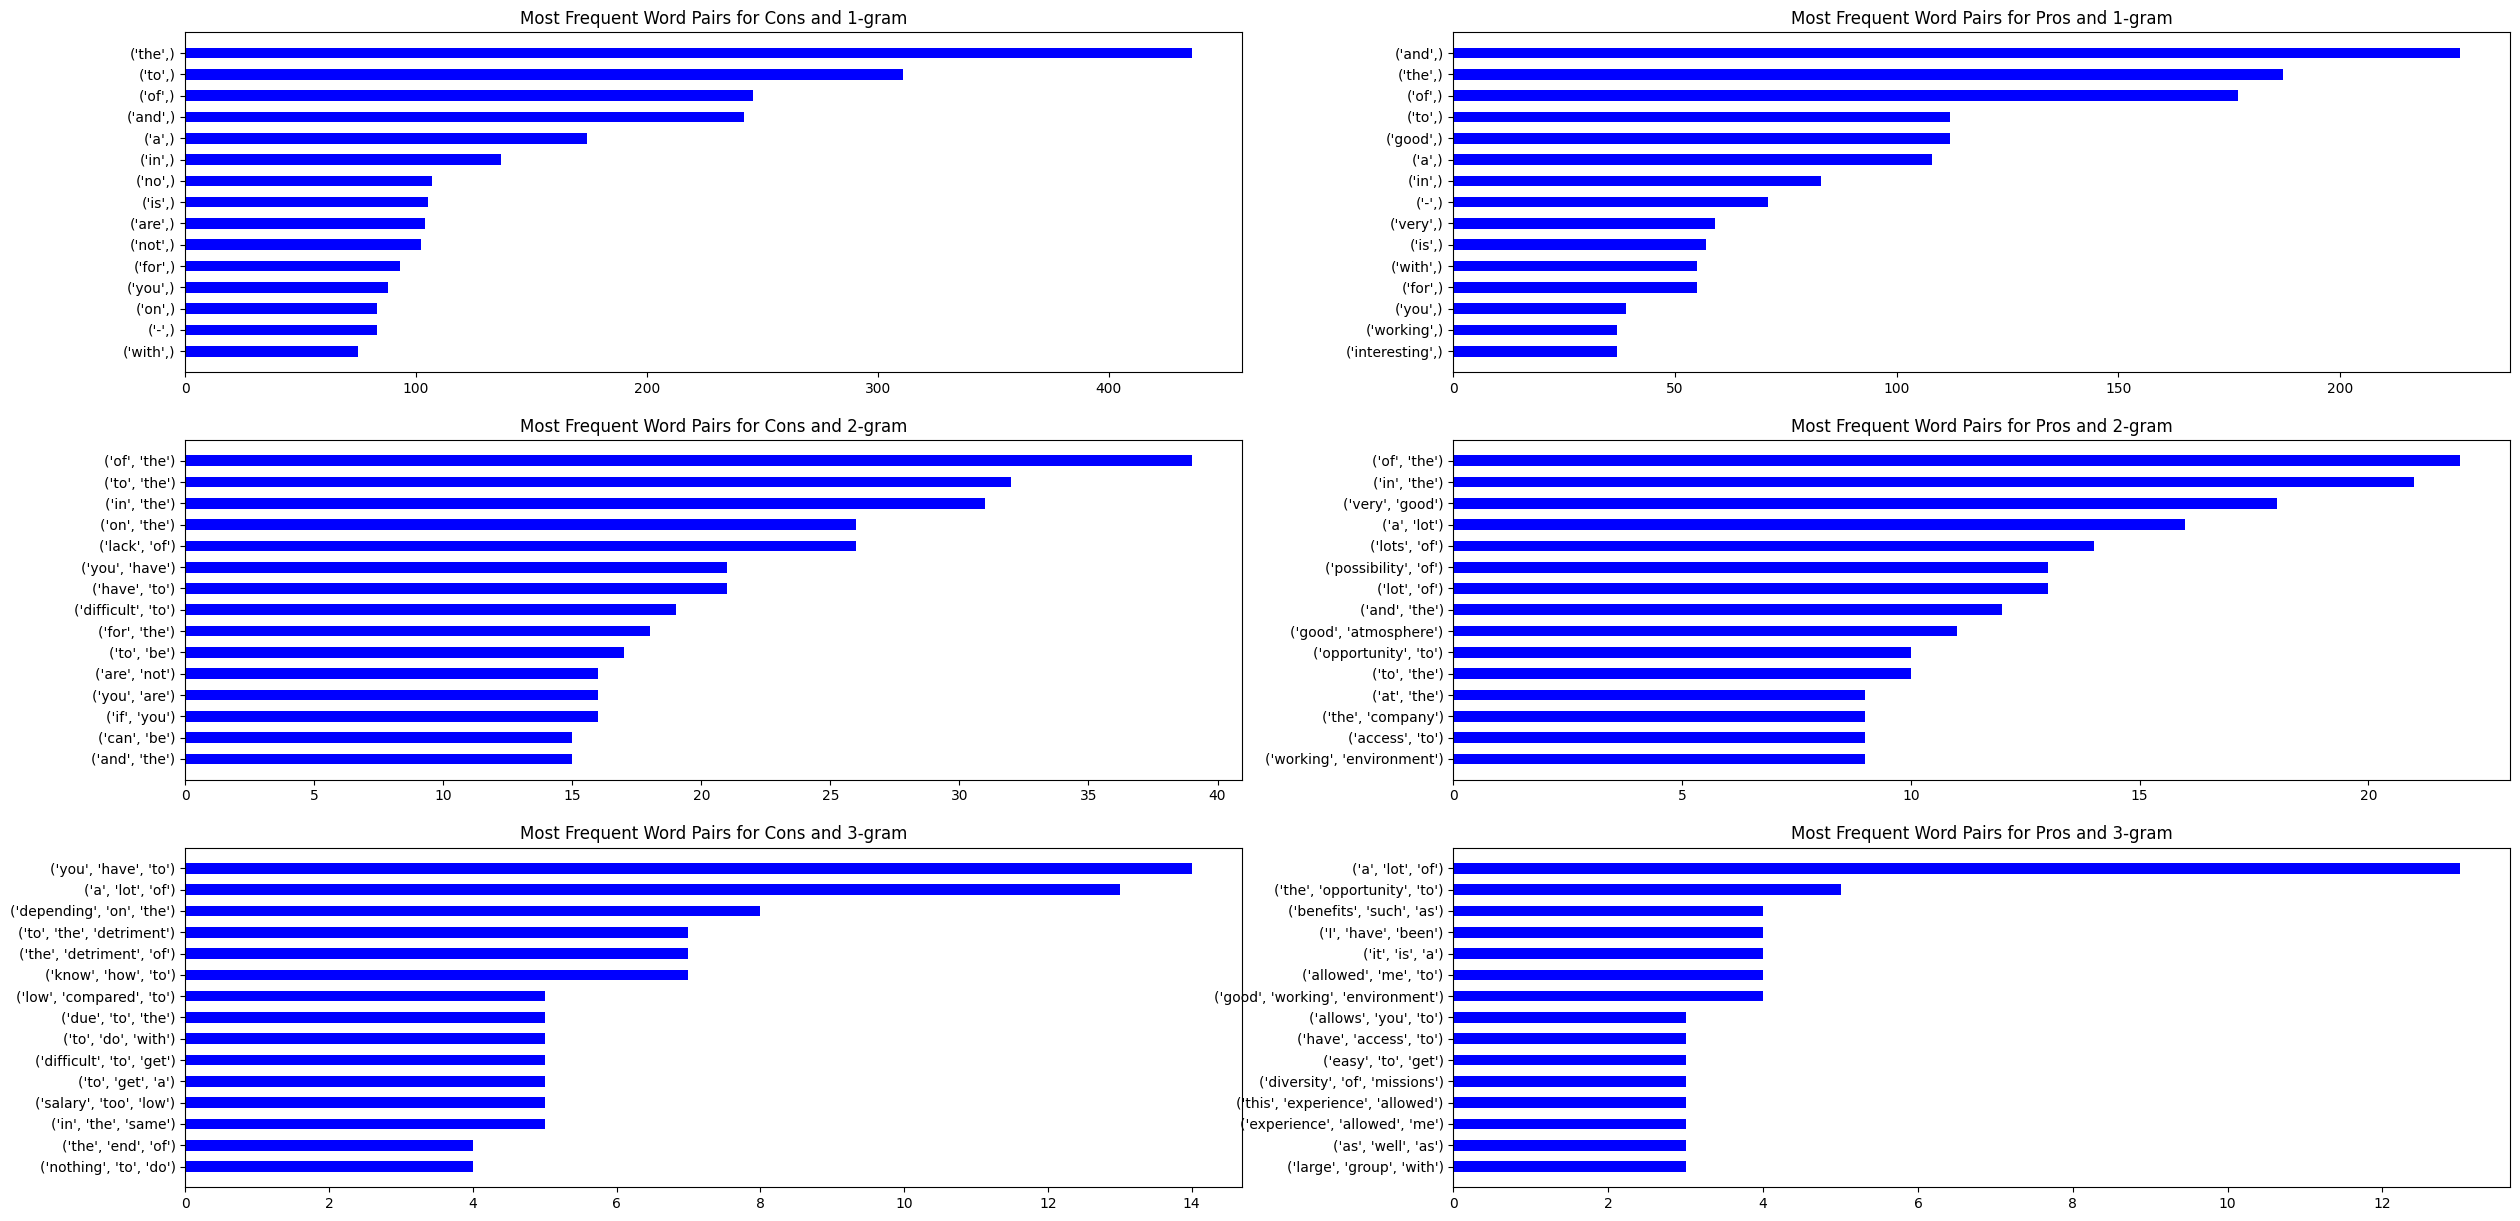

In [13]:
fig, ax = plt.subplots(3,2, figsize=[30,15])

for n_grams, tag in zip(big_n_grams, ["Pros", "Cons"]):
    # List of list
    for n, n_gram in enumerate(n_grams):
        # list of pairs
        #print(n_gram)
        word_pair_counts = {}
        for pair in n_gram:
            if pair in word_pair_counts:
                word_pair_counts[pair] += 1
            else:
                word_pair_counts[pair] = 1

        # Get the most common pairs based on frequency
        most_common_pairs = sorted(word_pair_counts.items(), key=lambda x: x[1], reverse=True)[:15]

        # Separate the pairs and their frequencies
        pairs, frequencies = zip(*most_common_pairs)
        
        # Plot the bar plot
        y = 1 if tag=="Pros" else 0
        x = n
        
        pairs = [str(pair) for pair in pairs[::-1]]
        frequencies = list(frequencies[::-1])
        
        #print(len(word_pair_counts.keys()), "n:", n+1, x, y, tag, len(pairs), len(frequencies), pairs, frequencies)
        ax[x,y].barh(y=pairs, width=frequencies, height=0.5, color="blue")
        #ax[x,y].set_ylabel('Word Pairs')
        #ax[x,y].set_xlabel('Frequency')
        ax[x,y].set_title(f'Most Frequent Word Pairs for {tag} and {n+1}-gram')
        #ax[x,y].set_xticks(ticks=,rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.show()

Pour les pros, on remarque certains mots faciles à identifier :
* Bonne / ambiance

Mais cela représente peu les mots présents

D'un autre côté, les mots négatifs permettent très facilement d'identifier le sentiment d'un commentaire
* Peut-être (indécis)
* Peut (amélioration potentielle)
* Ne

**Nous n'avons que 400 commentaires**

### Data cleaning

Our Data is clean, however, we can check the reviews that have no tag. We aim to add a tag for the unlabelled comments by training a model with the comments already tagged. Sometimes, a tag isn't really depicted in the comment and it might be helpful adding some more data to get a bertter model

In [25]:
columns = ["Recommandation","Approb CEO","Perspective"]
for colonne in columns:
    percent_unlabel = df[df[colonne].isna()].shape[0] / df.shape[0]
    print(f"{colonne} || % de None : {percent_unlabel}")


percent_unlabel = df[(df["Recommandation"].notna())&(df["Approb CEO"].notna())&(df["Perspective"].notna())].shape[0] / df.shape[0]
print(f"Number of comments with all tags : {percent_unlabel}")
percent_unlabel = df[(df["Recommandation"].isna())&(df["Approb CEO"].isna())&(df["Perspective"].isna())].shape[0] / df.shape[0]
print(f"Number of comments with 0 tags : {percent_unlabel}")

Recommandation || % de None : 0.3125
Approb CEO || % de None : 0.4375
Perspective || % de None : 0.3575
Number of comments with all tags : 0.5375
Number of comments with 0 tags : 0.3


In [29]:
from happytransformer import HappyTextToText, TTSettings
happy_tt = HappyTextToText("T5", "vennify/t5-base-grammar-correction")

01/18/2024 15:01:14 - INFO - happytransformer.happy_transformer -   Using device: cpu


In [31]:
args = TTSettings(num_beams=5, min_length=1)

pros_en_clean = [happy_tt.generate_text(sentence, args=args) 
                 for sentence in pros_en]

cons_en_clean = [happy_tt.generate_text(sentence, args=args) 
                 for sentence in cons_en]

df_clean = df.copy()

df_clean["Pros"] = pros_en_clean
df_clean["Cons"] = cons_en_clean

In [32]:
df_clean.to_csv("clean_NLP_reviews_data.csv")

In [ ]:
df_clean_2 = pd.read_csv("clean_NLP_reviews_data.csv")

In [ ]:
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
 
warnings.filterwarnings(action='ignore')
 
data = []

f = ". ".join(df_clean_2["Pros"].values.tolist())

# iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []
 
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
 
    data.append(temp)
 
# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count=1,
                                vector_size=100, window=5)
 
# Print results
print("Cosine similarity between 'alice' " +
      "and 'wonderland' - CBOW : ",
      model1.wv.similarity('alice', 'wonderland'))
 
print("Cosine similarity between 'alice' " +
      "and 'machines' - CBOW : ",
      model1.wv.similarity('alice', 'machines'))
 
# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count=1, vector_size=100,
                                window=5, sg=1)
 
# Print results
print("Cosine similarity between 'alice' " +
      "and 'wonderland' - Skip Gram : ",
      model2.wv.similarity('alice', 'wonderland'))
 
print("Cosine similarity between 'alice' " +
      "and 'machines' - Skip Gram : ",
      model2.wv.similarity('alice', 'machines'))